# Imports

In [21]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Data


### Data Loading

---



In [4]:
df = pd.read_csv("data/airlines_delay.csv")

df = df.sample(frac=0.01, random_state=1)

X = df.drop(['Class'], axis=1)
y =
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
21403,2219.0,865.0,164.0,DL,MSP,AUS,3,0
121631,966.0,480.0,161.0,US,PWM,CLT,7,0
535152,2044.0,967.0,78.0,XE,MSN,CLE,7,1
487001,2596.0,460.0,64.0,XE,CLE,IND,1,0
69899,710.0,555.0,200.0,AA,DFW,LGA,7,0


### Data Summary

---

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5394 entries, 21403 to 427197
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Flight       5394 non-null   float64
 1   Time         5394 non-null   float64
 2   Length       5394 non-null   float64
 3   Airline      5394 non-null   object 
 4   AirportFrom  5394 non-null   object 
 5   AirportTo    5394 non-null   object 
 6   DayOfWeek    5394 non-null   int64  
 7   Class        5394 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 379.3+ KB


### Data Description

---



In [6]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,5394.000000,5394.000000,5394.000000,5394.000000,5394.000000
mean,2438.118836,806.651650,130.400816,3.919726,0.453281
std,2064.819415,280.490176,69.619894,1.905434,0.497859
min,1.000000,20.000000,25.000000,1.000000,0.000000
25%,699.250000,565.000000,81.000000,2.000000,0.000000
50%,1834.000000,803.500000,115.000000,4.000000,0.000000
75%,3755.750000,1040.000000,160.000000,5.000000,1.000000
max,7804.000000,1439.000000,560.000000,7.000000,1.000000


### Check Null Values

---



In [7]:
df.isna().any()

Flight         False
Time           False
Length         False
Airline        False
AirportFrom    False
AirportTo      False
DayOfWeek      False
Class          False
dtype: bool

In [8]:
df.isna().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

### Count Unique Values

---



In [9]:
df.nunique()

Flight         3251
Time            784
Length          350
Airline          18
AirportFrom     235
AirportTo       245
DayOfWeek         7
Class             2
dtype: int64

Check Feature Correlation with Heatmap

<Axes: >

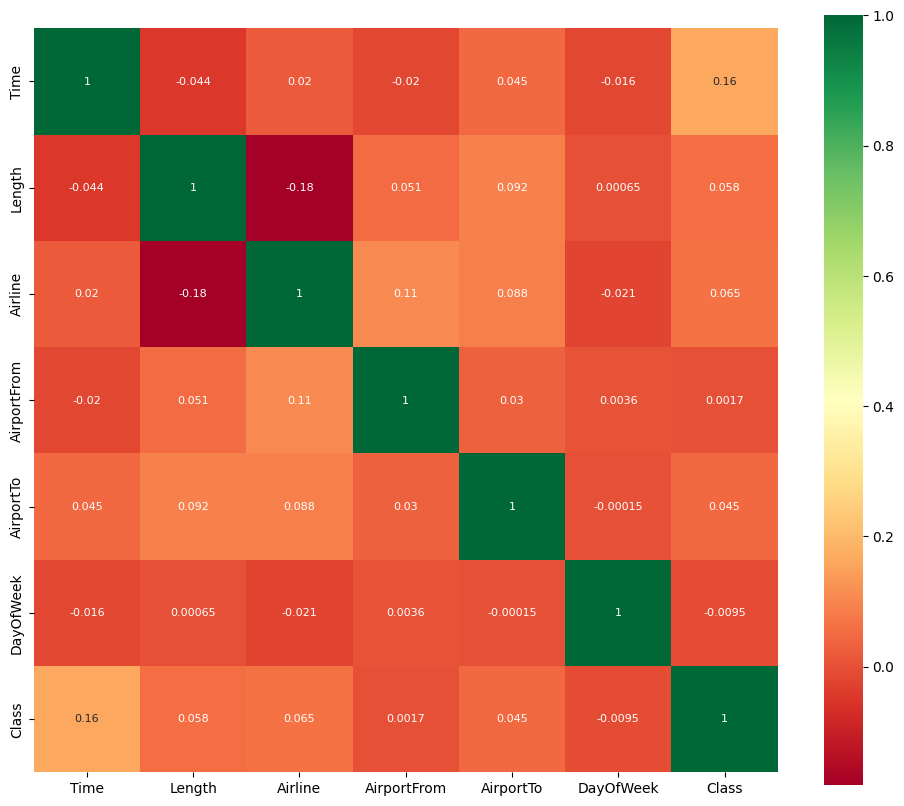

In [28]:
##Heatmap without flight ID

## Drop flight ID
heat_df = df.drop(['Flight'], axis=1)

corr = heat_df.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,square=True,annot=True,annot_kws={'size':8}, cmap="RdYlGn")

## Data Exploration

### Change Categorical Type Data to Numerical Type Data

---



In [ ]:
##Pairplot

sns.pairplot(df)

In [11]:
# get list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Airline', 'AirportFrom', 'AirportTo']

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols: 
    # Encode values in training set
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [13]:
# get list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

[]

### Pairplot 

---



In [29]:
pair_df = df.sample(frac=0.01, random_state=1).drop(['Flight'], axis=1)

## Change Class to categorical

sns.pairplot(pair_df, hue="Class", kind="reg")

TypeError: pairplot() got an unexpected keyword argument 'title'

### Feature Selection

---

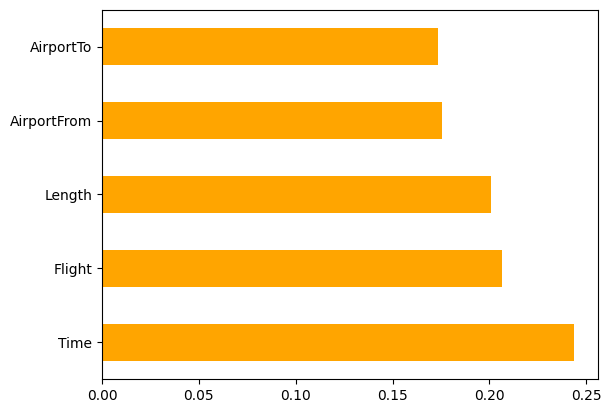

In [22]:

#Feature importance is an inbuilt class that comes with Tree Based Classifiers,
#we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

#import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

# #FEATURE SELECTION
model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(5).plot(kind='barh', color='orange')
plt.show()

### Data test and train split

---

In [24]:
## Select Importance Features from feat_importances
features = feat_importances.nlargest(5).index.tolist()
X = df[features]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

## Gaussian Naive Bayes Model
nb = GaussianNB()

# Train the model using the training sets
nb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = nb.predict(X_test)

Accuracy:  0.5987025023169601


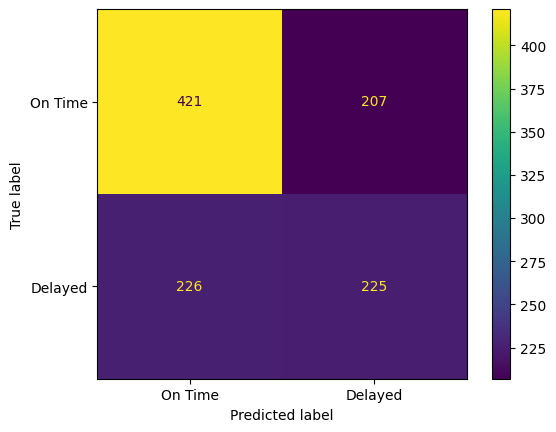

In [27]:
# Model Accuracy, how often is the classifier correct?
accuracy =  accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the accuracy
print("Accuracy: ", accuracy)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion, display_labels=['On Time', 'Delayed']).plot()